# Clasificación de Pokemones utilizando CNN
## Statistical Learning II
**José Fernando Pérez Pérez**  
josefernando.perez@galileo.edu  
20000756

---

### Resumen del paper en el que se inspiro la realización de este proyecto

**Título:** ImageNet Classification with Deep Convolutional
Neural Networks  
**Autor(es):** Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton  
La idea principal del paper es la introducción de las redes por convolución para realizar tareas de clasificación de imagénes con el objetivo de competir en la clasificación del Dataset ImageNet.  
Se propone una arquitectura de 8 capas en total, 5 capas convolucionales y 3 capas de redes totalmente conectadas. A continuación la red propuesta en el paper:
![CNN](https://computervisionblog.files.wordpress.com/2015/11/alexnet.png)
Se utilizó la función de activación *relu*, también se indica que pensaron en utilizar otra función como *tanh*; sin embargo, en varios estudios previos se demostraba que la función de activación *relu* aproxima una tasa de error baja en menos pasos de entrenamiento. Como se puede observar a continuación:
Format: ![relutanh](https://qph.fs.quoracdn.net/main-qimg-f03b78d21813e269736c3b7a395a1476.webp)
Se explican las técnicas utilizadas para minimizar la probabilidad de un sobreajuste en la red:
* Data augmentation: Utilizar transformaciones en imagénes que permitan obtener un conjunto de datos con mayor diversidad, por ejemplo, aplicar rotaciones y acercamientos a las imagenes.
* Dropout: Desactivar neuronas que no pasen el umbral definido.
Ambas técnicas se utilizaran para la implementación del proyecto.

Fuente: [ImageNet Classification with Deep Convolutional](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

### Propuesta

Como propuesta de proyecto utilizando redes neuronales convolucionales se implementará un modelo que permita la clasificación de 6 pokemones elegidos de la primera generación. El conjunto de datos se obtuvo de dos fuentes, la primera un script desarrollado personalmente que realiza búsquedas en google images con el nombre del pokemon y descarga las primeras 50 imagenes y las almacena en una carpeta con el número del pokemon; luego se realizó un proceso de limpieza manual para descartar aquellas imagenes que no eran aptas para la tarea.  

En total se tienen aproximadamente 35 imagenes por categoría, a continuación una muestra de las imagenes.

| Dragonite                         | Charizard | Omanyte |
| --------------------------------- | --------- | ------- |
|![](Pokemon1G/Dragonite/1con.jpg) | ![](Pokemon1G/Charizard/1.jpg) | ![](Pokemon1G/Omanyte/19.jpg) |
| **Arbok**                         | **Gengar** | **Oddish** |
|![](Pokemon1G/Arbok/18.jpg) | ![](Pokemon1G/Gengar/3.jpg) | ![](Pokemon1G/Oddish/29.jpg) |

In [99]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers
import tensorflow as tf
import keras

from PIL import Image
import requests
from io import BytesIO
from urllib.request import urlopen

In [3]:
# Constantes
width, height = 224, 224
data_path = 'Pokemon1G'

In [24]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.15,
    rotation_range=5,
    horizontal_flip=True,
    validation_split=0.15
)

# Entrenamiento
train_gen = data_gen.flow_from_directory(data_path,
                                        target_size=(width, height),
                                        batch_size=24,
                                        class_mode='categorical',
                                        #save_to_dir='training',
                                        subset='training')

# Validacion
valid_gen = data_gen.flow_from_directory(data_path,
                                        target_size=(width, height),
                                        batch_size=24,
                                        class_mode='categorical',
                                        #save_to_dir='validation',
                                        subset='validation'
                                        )

Found 182 images belonging to 6 classes.
Found 28 images belonging to 6 classes.


## Definición CNN

In [25]:
#Early stopping
earlystop_monitor = EarlyStopping(monitor='val_loss', verbose=1, patience=30, baseline=0.4,)
#Model checkpoint
best_model = 'cnn_pokedex.h5'
checkpoint = ModelCheckpoint(best_model, verbose=0, monitor='val_loss', save_best_only=True, mode='auto')

callbacks = [checkpoint]

In [44]:
cnn = Sequential()
cnn.add(Conv2D(32,
              kernel_size=(3,3),
              activation='relu',
              input_shape=(width, height, 3))
       )
cnn.add(MaxPool2D(pool_size=(3,3)))

cnn.add(Conv2D(64,
              kernel_size=(3,3),
              activation='relu')
       )
cnn.add(MaxPool2D(pool_size=(3,3)))

cnn.add(Dropout(rate=0.25))
cnn.add(Flatten())

cnn.add(Dense(128,
              kernel_initializer='uniform',
              kernel_regularizer=regularizers.l2(0.001),
              activation='relu')
       )
cnn.add(Dropout(rate=0.5))

cnn.add(Dense(6,
              kernel_initializer='uniform',
              activation='softmax')
       )

cnn.compile(loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

**Entrenando la red**

Tiempo de entrenamiento...!
Epoch 1/20
7/7 [==============================] - 3s 444ms/step - loss: 5.5507 - accuracy: 0.1772 - val_loss: 4.9153 - val_accuracy: 0.1667
Epoch 2/20
7/7 [==============================] - 3s 400ms/step - loss: 4.6688 - accuracy: 0.2658 - val_loss: 4.2410 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 3s 403ms/step - loss: 3.9786 - accuracy: 0.3671 - val_loss: 3.5596 - val_accuracy: 0.5417
Epoch 4/20
7/7 [==============================] - 3s 421ms/step - loss: 3.3106 - accuracy: 0.5238 - val_loss: 2.9433 - val_accuracy: 0.5833
Epoch 5/20
7/7 [==============================] - 3s 419ms/step - loss: 2.8302 - accuracy: 0.5595 - val_loss: 2.5389 - val_accuracy: 0.7917
Epoch 6/20
7/7 [==============================] - 3s 377ms/step - loss: 2.4328 - accuracy: 0.6582 - val_loss: 2.2495 - val_accuracy: 0.7083
Epoch 7/20
7/7 [==============================] - 3s 451ms/step - loss: 2.1189 - accuracy: 0.6962 - val_loss: 2.0633 - val_accuracy:

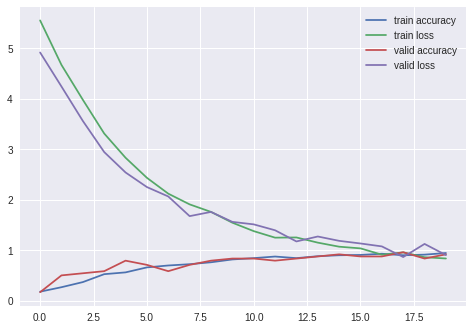

Entrenamiento finalizado
CPU times: user 7min 21s, sys: 28.3 s, total: 7min 49s
Wall time: 1min 14s


In [45]:
%%time
print("Tiempo de entrenamiento...!")
history = cnn.fit_generator(generator=train_gen,
                           steps_per_epoch=(train_gen.samples // 24),
                           validation_data=valid_gen,
                           validation_steps=(valid_gen.samples // 24),
                           epochs=20,
                           callbacks=callbacks,
                           )
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_accuracy'], label='valid accuracy')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.show()
print("Entrenamiento finalizado")

In [156]:
# Se evalua el modelo con datos de prueba
test_loss, test_acc = cnn.evaluate_generator(generator=valid_gen)
print("'Loss' de prueba: ", test_loss)
print("'Accuracy' de prueba: ", test_acc)

'Loss' de prueba:  0.8924165964126587
'Accuracy' de prueba:  0.9285714030265808


Como se puede observar la red propuesta alcanza un valor de *accuracy* del 92% en el conjunto de datos de prueba. Dado que el checkpoint se ha generado, se procede a cargar y realizar predicciones.

In [54]:
# Diccionario con los ids a nombre de Pokemon
idx_toclass = {i: j for j, i in train_gen.class_indices.items()}
print(idx_toclass)

{0: 'Arbok', 1: 'Charizard', 2: 'Dragonite', 3: 'Gengar', 4: 'Oddish', 5: 'Omanyte'}


**Carga y sumarización del mejor modelo entrenado**

In [55]:
# Cargamos el modelo a partir del archivo generado y mostramos un resumen del mismo
final_cnn = tf.keras.models.load_model("cnn_pokedex.h5")
final_cnn.build()
final_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [56]:
x_test, y_test = valid_gen.next()

In [88]:
def show_predictions(x, y, model, idxtoclass, n_imgs=8, columns=4):
    N = x.shape[0]
    idx = np.random.randint(0, N, n_imgs)
    x_batch = x[idx]
    y_batch = y[idx]
    
    rows = np.ceil(n_imgs / columns).astype(np.int)
    plt.figure(figsize = (25, 15))
    for i in range(n_imgs):
        x = x_batch[i]
        plt.subplot(rows, columns, i+1)
        label = model.predict_classes(x.reshape(1, width, height, -1))[0]
        pclass = idxtoclass[label]
        plt.imshow(x)
        plt.axis('off')
        plt.title(f"Predicted:{pclass}")

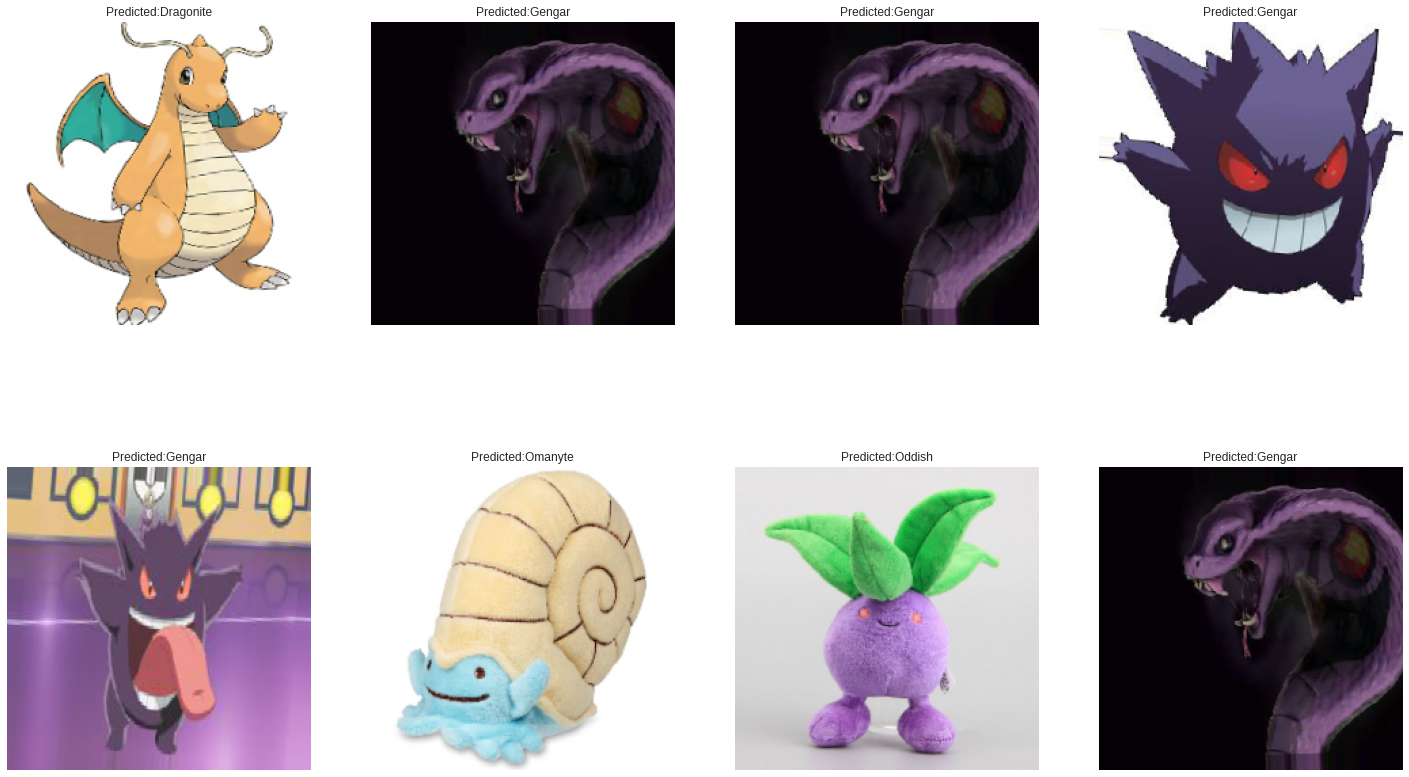

In [89]:
show_predictions(x_test, np.argmax(y_test, axis=1), final_cnn, idx_toclass)

## Predicción con imagénes desconocidas a partir de una URL

In [79]:
def predict(x, model, idxtoclass):
    label = model.predict_classes(x.reshape(1, width, height, -1))[0]
    pclass = idxtoclass[label]
    plt.imshow(x)
    plt.axis('off')
    plt.title(f"Predicted: {pclass}")

In [111]:
def predict_fromURL():
    url = input("Ingrese URL del pokemon a predecir en formato JPEG...")
    img = Image.open(urlopen(url))
    img = img.resize((width, height), Image.ANTIALIAS)
    np_img = np.asarray(img)
    predict(np_img, final_cnn, idx_toclass)

Ingrese URL de la imagen en formato JPG...https://pm1.narvii.com/6371/25ad07e6c21e857eebd8f187d78bf0a03e057b69_hq.jpg


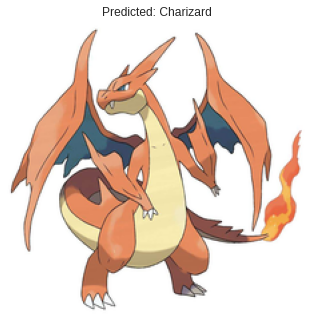

In [104]:
predict_fromURL()

Ingrese URL de la imagen en formato JPG...https://www.ssbwiki.com/images/6/63/Charizard_SSBB.jpg


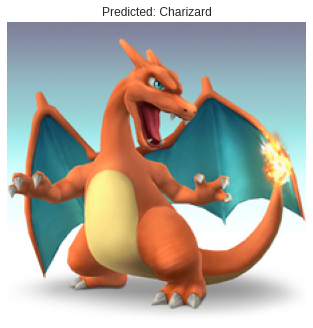

In [105]:
predict_fromURL()

Ingrese URL del pokemon a predecir...https://pbs.twimg.com/profile_images/1247910720936849409/6O0LJPuo_400x400.jpg


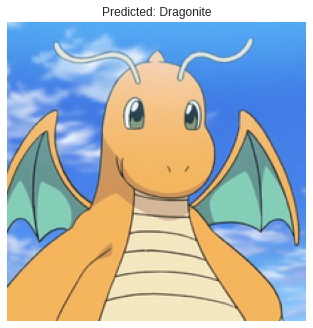

In [110]:
predict_fromURL()

Ingrese URL del pokemon a predecir en formato JPEG...https://i1.wp.com/porquepuedo.net/wp-content/uploads/2016/10/encontrar-a-oddish-en-pokemon-go.jpg?fit=675%2C675


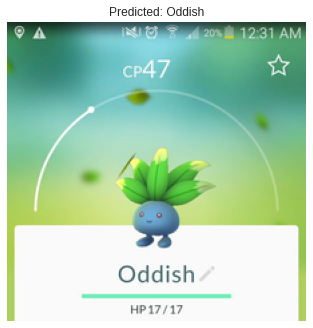

In [112]:
predict_fromURL()

Ingrese URL del pokemon a predecir en formato JPEG...https://vignette.wikia.nocookie.net/espokemon/images/2/2b/EP444_Arbok.jpg/revision/latest/scale-to-width-down/340?cb=20100704022517


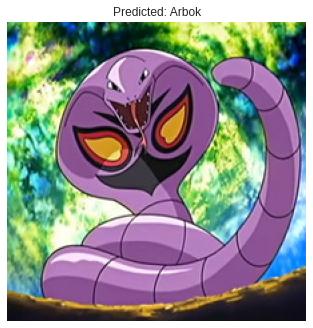

In [113]:
predict_fromURL()

Ingrese URL del pokemon a predecir en formato JPEG...https://www.alfabetajuega.com/wp-content/uploads/2019/10/Gengar.jpg


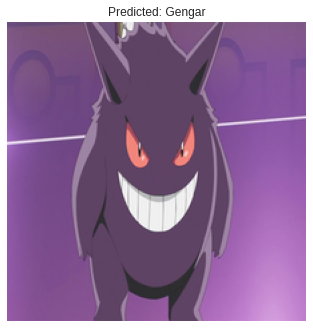

In [117]:
predict_fromURL()

## Visualización de los filtros creados en las capas intermedias

**En escala de grises, separados por canal**

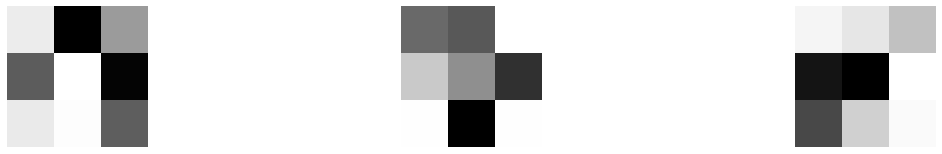

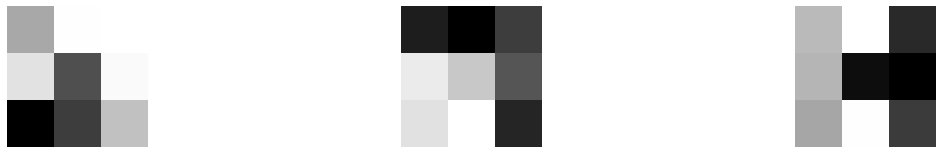

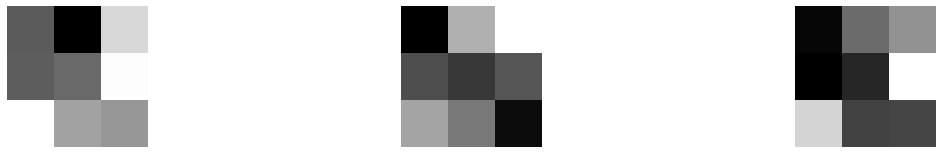

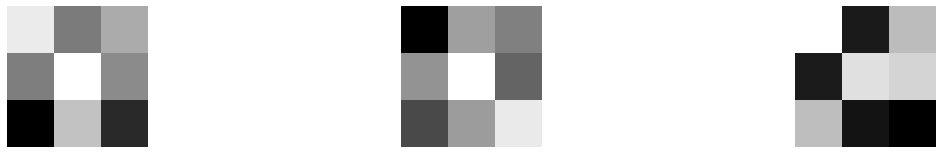

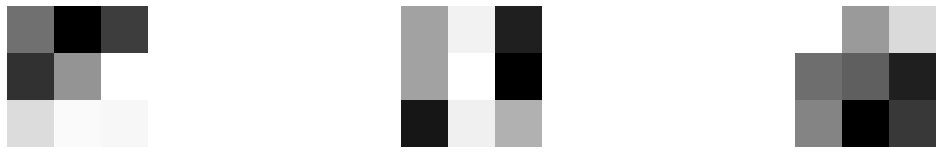

In [151]:
# Se obtienen los pesos y el sesgo de la primer capa oculta
filters, biases = final_cnn.layers[0].get_weights()
# Se estandariza el valor de los filtros
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# Se muestran los primeros n filtros
n_filters, ix = 5, 1

for i in range(n_filters):
    plt.figure(figsize=(20,15))
    f = filters[:, :, :, i]
    # Se grafica por separado cada color
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j])
        ix += 1
    # show the figure
    plt.show()

**A colores**

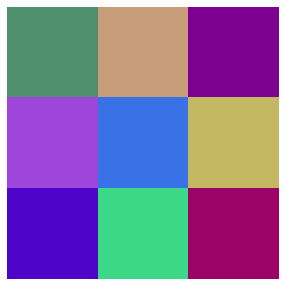

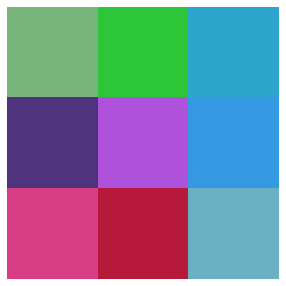

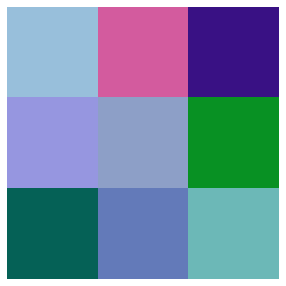

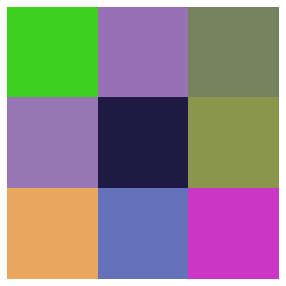

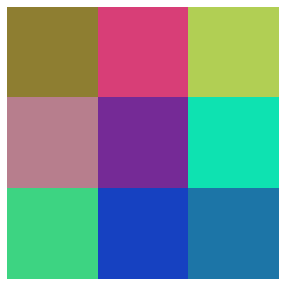

In [154]:
# Se obtienen los pesos y el sesgo de la primer capa oculta
filters, biases = final_cnn.layers[0].get_weights()
# Se estandariza el valor de los filtros
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# Se muestran los primeros n filtros
n_filters, ix = 5, 1

for i in range(n_filters):
    plt.figure(figsize=(10,5))
    f = filters[:, :, :, i]
    plt.imshow(f)
    plt.axis('off')
    plt.show()

## Conclusiones
* Se implemento un modelo utilizando redes convolucionales para aproximar la función que permite clasificar 6 tipos de pokemones.
* Se utilizo un dataset propio creado a partir de imagenes de google, el conjunto de datos original contiene todos los pokemones de la primera generación. Sin embargo, para motivos de este proyecto se utilizaron la 6 clases que tenían más imagenes.
* Se entreno la red utilizando CPU y no GPU, lo cuál hizo que fuera un poco mas lento. La red propuesta no es tan robusta y eso permitió que no tardase tanto tiempo de entrenamiento.
* Se obtuvo un accuracy del 90% en el set de validación, al momento de hacer pruebas con imagenes desconocidas se pudo validar que logra clasificar de forma correcta. Si bien el modelo no es perfecto, se puede considerar una aproximación acertada.
* Como opinión personal, considero que graficar algunos filtros creados me permitió comprender un poco más la idea detrás de este enfoque. Se puede indagar que encuentra bordes, hace diferenciación de colores, etc.

* Me he divertido bastante con este proyecto, además que aprendí muchas cosas que no sabía Mi próximo objetivo es aplicar transfer learning al conjunto de datos original para experimentar y ver si con el conjunto de datos reducido se pudiera hacer una clasificación con al menos 80% de 'accuracy' de todos los pokemones de la primer generación.